In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

# importing functions
from Weigfun import Weigfun
from HBVMod import HBVMod

Importing data

In [2]:
df = pd.read_csv("Forcing.txt", delimiter="	", names=["year","month","day","P","Q","EP"])
df.index = df.apply(lambda x: pd.Timestamp(f'{int(x.year)}-{int(x.month)}-{int(x.day)}'),axis=1)
df.drop(columns=["year","month","day"],inplace=True)
df.head()

,P,Q,EP
1997-08-01,8.888,0.388,1.715079
1997-08-02,0.265,0.517,3.779446
1997-08-03,1.034,0.543,2.157360
1997-08-04,0.000,0.448,4.788141
1997-08-05,0.000,0.428,4.964434


#### function to run montecarlo simulation:

In [3]:
def run_itteration_NSE(Obj_type):
    #####              Imax,  Ce,  Sumax, beta,  Pmax,  Tlag,   Kf,   Ks
    ParMinn = np.array([0,   0.2,  40,    .5,   .001,   0,     .01,  .0001])
    ParMaxn = np.array([8,    1,  800,   4,    .3,     10,    .1,   .01])
    #####         Si,   Su, Sf, Ss
    Sin= np.array([0,  100,  0,  5  ])

    ### setting up parameters
    nmax          = 5000
    store_results = np.zeros((nmax, len(ParMinn)+1))
    n_feasible    = 0

    for n in range(1, nmax):
        # generate a of random numbers
        Rnum = np.array([np.random.random() for i in range(len(ParMaxn))])
        # calculate the random parameter set
        Par = ParMinn + Rnum * (ParMaxn-ParMinn)
        Obj, df_out = HBVMod(Par, df, Sin, Obj_type=Obj_type)
        
        if Obj > 0.6:
            # save possible objective functions
            store_results[n_feasible, 0:8] = Par # store corrseponding Parameters
            store_results[n_feasible, 8]   = Obj # store corrseponding objective value 
            n_feasible += 1  

    np.savetxt(f'MC2_{Obj_type}.txt',store_results[0:n_feasible,:], delimiter =',')
    
def read_file(Obj_type):
    return np.genfromtxt(f'MC2_{Obj_type}.txt',  dtype=float, autostrip=True, delimiter=',') 

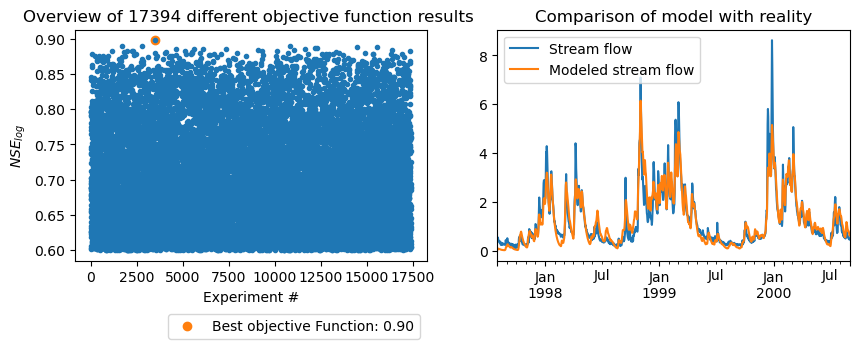

In [4]:
# avoid unncecessary runs
try:
    store_results = read_file("NSE")
    
except FileNotFoundError:
    run_itteration_NSE("NSE")
    store_results = read_file("NSE")

objective_function_array = store_results[:,8]
index_best = objective_function_array.argmax()
best       = objective_function_array[index_best]

fig, [ax, ax2] = plt.subplots(1,2, figsize=(10,3))
ax.plot(objective_function_array, lw=0, marker='.')
ax.plot(index_best, best,lw=0, marker="o", zorder=-1, label=f"Best objective Function: {best:.2f}")
ax.legend(bbox_to_anchor=(1,-0.2))
ax.set_ylabel("$NSE_{log}$")
ax.set_xlabel("Experiment #")
ax.set_title(f"Overview of {len(objective_function_array)} different objective function results ");

OptPar = store_results[index_best,:8]
    #####         Si,   Su, Sf, Ss
Sin= np.array([0,  100,  0,  5  ])

_ = HBVMod(OptPar, df, Sin, Obj_type="NSE",hydrograph=True, ax=ax2)

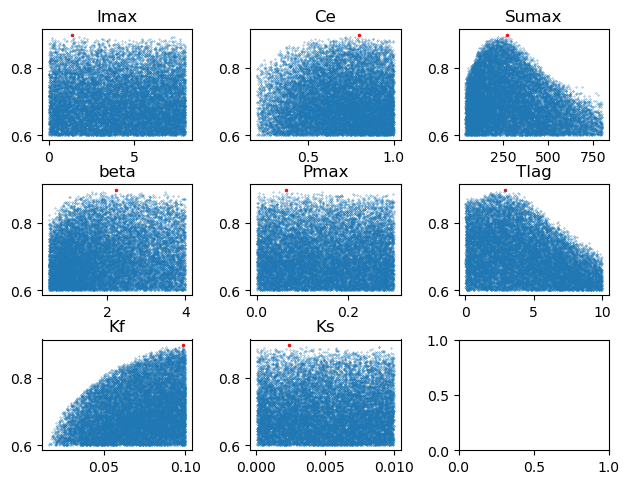

In [22]:
fig, ax = plt.subplots(3,3)
fig.tight_layout()
ax_index = ax.flatten()
param_names = ["Imax","Ce",  "Sumax", "beta",  "Pmax",  "Tlag",   "Kf",   "Ks"]
for i in range(len(store_results[0])-1):
    ax_index[i].plot(store_results[:,i],store_results[:,8], ".",markersize=0.5)
    ax_index[i].plot(store_results[:,i][store_results[:,8].argmax()],
                     store_results[:,8][store_results[:,8].argmax()],".",ms=3,zorder=-1,color="r")
    ax_index[i].set_title(param_names[i])

### Redo fo log

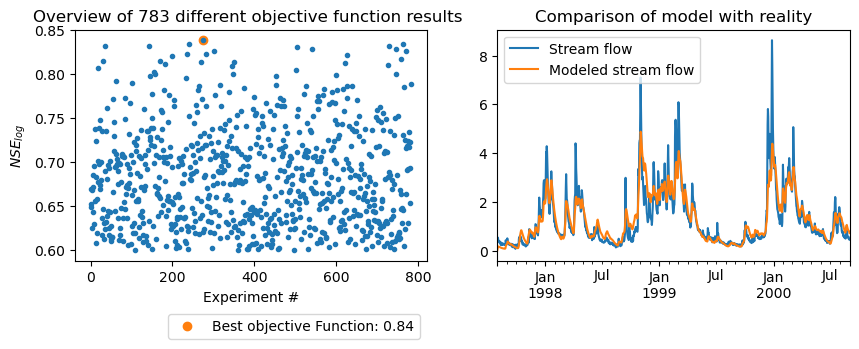

In [6]:
# avoid unncecessary runs
try:
    store_results_log = read_file("NSE_log")
    
except FileNotFoundError:
    run_itteration_NSE("NSE_log")
    store_results_log = read_file("NSE_log")
    
objective_function_array_log = store_results_log[:,8]
index_best_log = objective_function_array_log.argmax()
best_log       = objective_function_array_log[index_best_log]

fig, [ax, ax2] = plt.subplots(1,2, figsize=(10,3))
ax.plot(objective_function_array_log, lw=0, marker='.')
ax.plot(index_best_log, best_log,lw=0, marker="o", zorder=-1, label=f"Best objective Function: {best_log:.2f}")
ax.legend(bbox_to_anchor=(1,-0.2))
ax.set_ylabel("$NSE_{log}$")
ax.set_xlabel("Experiment #")
ax.set_title(f"Overview of {len(objective_function_array_log)} different objective function results ");

OptPar_log = store_results_log[index_best_log,:8]
    #####         Si,   Su, Sf, Ss
Sin= np.array([0,  100,  0,  5  ])

_ = HBVMod(OptPar_log, df, Sin, Obj_type="NSE_log",hydrograph=True, ax=ax2)

#### redo for sqrt

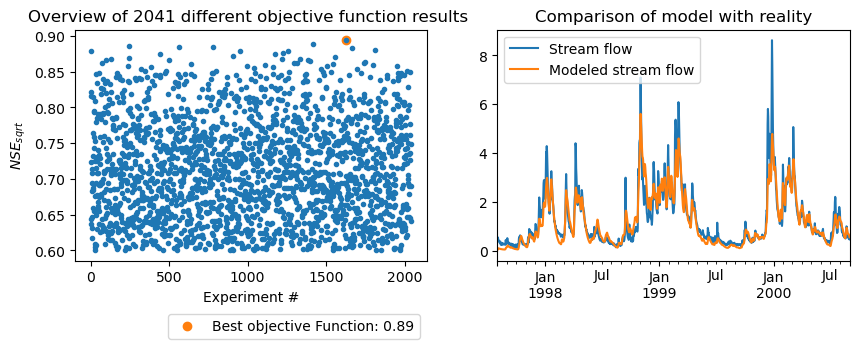

In [7]:
# avoid unncecessary runs
try:
    store_results_sqrt = read_file("NSE_sqrt")
    
except FileNotFoundError:
    run_itteration_NSE("NSE_sqrt")
    store_results_sqrt = read_file("NSE_sqrt")
    
objective_function_array_sqrt = store_results_sqrt[:,8]
index_best_sqrt = objective_function_array_sqrt.argmax()
best_sqrt       = objective_function_array_sqrt[index_best_sqrt]

fig, [ax, ax2] = plt.subplots(1,2, figsize=(10,3))
ax.plot(objective_function_array_sqrt, lw=0, marker='.')
ax.plot(index_best_sqrt, best_sqrt,lw=0, marker="o", zorder=-1, label=f"Best objective Function: {best_sqrt:.2f}")
ax.legend(bbox_to_anchor=(1,-0.2))
ax.set_ylabel("$NSE_{sqrt}$")
ax.set_xlabel("Experiment #")
ax.set_title(f"Overview of {len(objective_function_array_sqrt)} different objective function results ");

OptPar_sqrt = store_results_sqrt[index_best_sqrt,:8]
    #####         Si,   Su, Sf, Ss
Sin= np.array([0,  100,  0,  5  ])

_ = HBVMod(OptPar_sqrt, df, Sin, Obj_type="NSE_sqrt",hydrograph=True, ax=ax2)

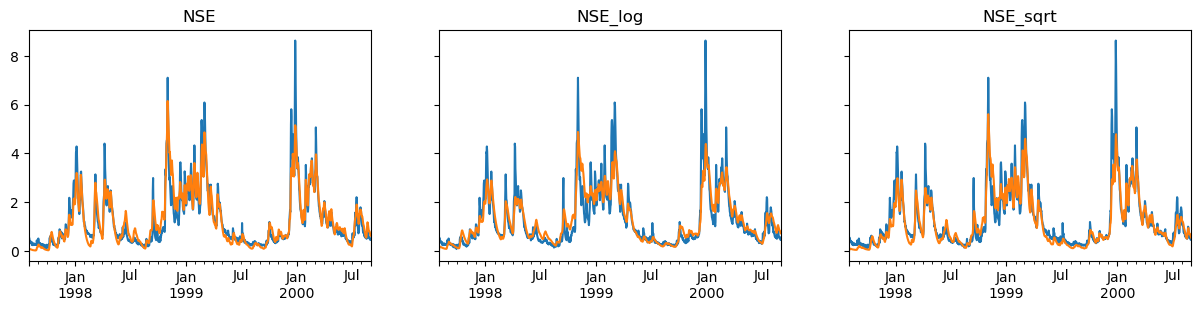

In [8]:
fig, ax = plt.subplots(1,3,figsize=(15,3), sharey=True)
_ = HBVMod(OptPar, df, Sin, Obj_type="NSE",hydrograph=True, ax=ax[0])
_ = HBVMod(OptPar_log, df, Sin, Obj_type="NSE_log",hydrograph=True, ax=ax[1])
_ = HBVMod(OptPar_sqrt, df, Sin, Obj_type="NSE_sqrt",hydrograph=True, ax=ax[2])

lst_title = ["NSE", "NSE_log", "NSE_sqrt"]
for index, axs in enumerate(ax):
    axs.set_title(lst_title[index])
    axs.get_legend().remove()

In [9]:
param_names = ["Imax","Ce",  "Sumax", "beta",  "Pmax",  "Tlag",   "Kf",   "Ks"]
df_params = pd.DataFrame(data=[OptPar,OptPar_log, OptPar_sqrt],columns=param_names)
df_params

,Imax,Ce,Sumax,beta,Pmax,Tlag,Kf,Ks
0,1.357924,0.794261,274.038648,2.234131,0.063593,2.930361,0.098811,0.002403
1,1.956024,0.622781,211.045638,1.718015,0.230514,3.714091,0.067138,0.009179
2,0.917590,0.698329,272.407243,2.454055,0.119532,3.363383,0.093945,0.007348
